In [176]:
%pip install connected-components-3d

     |████████████████████████████████| 2.8 MB 713 kB/s  eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [191]:
!pip install fuzzy-c-means

In [199]:
import nibabel as nib
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from os.path import join as opj
from sklearn.cluster import KMeans
from fcmeans import FCM
import cc3d

In [178]:
prior_path="priors_12younger_inMIITRAv2space"
data_path="data_15elder_inMIITRAv2space"

In [179]:
priors=glob.glob(opj(prior_path,"*.nii.gz"))
data=glob.glob(opj(data_path,"*.nii.gz"))

In [180]:
img=nib.load(data[0])
a=img.get_fdata()
prior=nib.load(priors[0]).get_fdata()

In [23]:
priors[0]

'priors_12younger_inMIITRAv2space/s5_l10_2_MIITRA2.nii.gz'

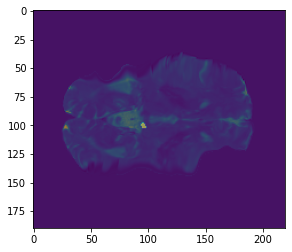

In [181]:
plt.imshow(a[:,:,91])
plt.imshow(prior[:,:,91],alpha=0.5)


In [33]:
bar=np.array(np.where(prior==1)).mean(axis=-1).astype("int")

In [34]:
half_side=6
x_min=bar[0]-half_side
x_max=bar[0]+half_side

y_min=bar[1]-half_side
y_max=bar[1]+half_side

z_min=bar[2]-half_side
z_max=bar[2]+half_side


In [40]:
box=img.dataobj[x_min:x_max,y_min:y_max,z_min:z_max]
mask_box=prior[x_min:x_max,y_min:y_max,z_min:z_max]

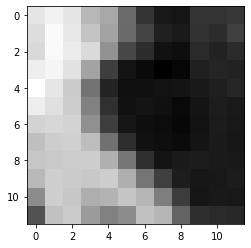

In [42]:
plt.imshow(box[:,:,6],cmap="gray")
# plt.imshow(mask_box[:,:,6],alpha=0.5)


## KMeans

In [62]:

size_x, size_y, size_z = box.shape

# Create one-dimensional arrays representing the indices along each dimension
indices_x = np.arange(2*half_side)
indices_y = np.arange(2*half_side)
indices_z = np.arange(2*half_side)

# Use numpy.meshgrid() to create a tuple of arrays representing the coordinates of all points in the grid
grid_x, grid_y, grid_z = np.meshgrid(indices_x, indices_y, indices_z, indexing='ij')

indices_3d = np.stack((grid_x, grid_y, grid_z), axis=-1)
box.flatten()

array([3212.29090293, 3198.61541722, 3294.96502076, ..., 1096.10343869,
       1043.74603032, 1010.19665702])

In [66]:
box_pos=np.concatenate([np.expand_dims(box,-1),indices_3d],axis=-1)

In [74]:
box_pos.shape

(12, 12, 12, 4)

In [196]:
n_cluster=15
kmeans = KMeans(n_clusters=n_cluster, random_state=0, n_init="auto").fit(box_pos.flatten().reshape(-1,1))

In [201]:
fcmeans=FCM(n_clusters=n_cluster)
fcmeans.fit(box_pos.flatten().reshape(-1,1))

In [214]:
centers = fcmeans.centers
labels = fcmeans.soft_predict(box_pos.flatten().reshape(-1,1))

In [208]:
labels.shape

(6912, 15)

In [215]:
labels=labels.reshape(2*half_side,2*half_side,2*half_side,4,n_cluster)

In [221]:
labels.shape

(12, 12, 12, 4, 15)

In [224]:
labels[:,:,:,:,12]

array([[[[4.91602725e-04, 1.20020540e-05, 1.20020540e-05,
          1.20020540e-05],
         [2.10055604e-04, 1.20020540e-05, 1.20020540e-05,
          8.05389859e-06],
         [1.73894395e-03, 1.20020540e-05, 1.20020540e-05,
          4.88689722e-06],
         ...,
         [3.91648323e-03, 1.20020540e-05, 1.20020540e-05,
          4.85441008e-06],
         [1.36871488e-05, 1.20020540e-05, 1.20020540e-05,
          8.04822688e-06],
         [1.26735074e-03, 1.20020540e-05, 1.20020540e-05,
          1.20502538e-05]],

        [[3.20824893e-04, 1.20020540e-05, 8.05389859e-06,
          1.20020540e-05],
         [9.86203165e-04, 1.20020540e-05, 8.05389859e-06,
          8.05389859e-06],
         [2.55864550e-03, 1.20020540e-05, 8.05389859e-06,
          4.88689722e-06],
         ...,
         [1.26353458e-04, 1.20020540e-05, 8.05389859e-06,
          4.85441008e-06],
         [6.23588359e-04, 1.20020540e-05, 8.05389859e-06,
          8.04822688e-06],
         [7.47976614e-05, 1.2002054

In [217]:
labels.argmax(axis=-1)

array([[[[ 0,  8,  8,  8],
         [ 0,  8,  8,  8],
         [ 2,  8,  8,  8],
         ...,
         [ 9,  8,  8,  8],
         [ 1,  8,  8,  8],
         [ 2,  8,  8,  8]],

        [[10,  8,  8,  8],
         [11,  8,  8,  8],
         [ 5,  8,  8,  8],
         ...,
         [ 0,  8,  8,  8],
         [ 1,  8,  8,  8],
         [ 0,  8,  8,  8]],

        [[12,  8,  8,  8],
         [12,  8,  8,  8],
         [12,  8,  8,  8],
         ...,
         [ 0,  8,  8,  8],
         [ 0,  8,  8,  8],
         [11,  8,  8,  8]],

        ...,

        [[ 7,  8,  8,  8],
         [14,  8,  8,  8],
         [ 3,  8,  8,  8],
         ...,
         [ 6,  8,  8,  8],
         [10,  8,  8,  8],
         [14,  8,  8,  8]],

        [[ 7,  8,  8,  8],
         [14,  8,  8,  8],
         [ 7,  8,  8,  8],
         ...,
         [ 6,  8,  8,  8],
         [ 6,  8,  8,  8],
         [ 3,  8,  8,  8]],

        [[14,  8,  8,  8],
         [ 7,  8,  8,  8],
         [14,  8,  8,  8],
         ...,
 

In [197]:
pred_mask=kmeans.predict(box_pos.flatten().reshape(-1,1)).reshape(2*half_side,2*half_side,2*half_side,4)
pred_mask=fcmeans.predict(box_pos.flatten().reshape(-1,1)).reshape(2*half_side,2*half_side,2*half_side,4)

AttributeError: 'NoneType' object has no attribute 'predict'

## Look for cluster containing the centroids

In [172]:
cl_dim=[]
selected=[]
for i in range(n_cluster):
    # print(box_pos[pred_mask[:,:,:,0]==0][:,1:])
    if [half_side,half_side,half_side] in box_pos[pred_mask[:,:,:,0]==i][:,1:].astype("int").tolist():
        selected=i
        break

In [169]:
[6,6,6] in box_pos[pred_mask[:,:,:,0]==12][:,1:].astype("int").tolist()
# (half_side,half_side,half_side)

True

In [183]:
labels_out = cc3d.connected_components(pred_mask[:,:,:,0]==i)

In [187]:
con_idx,con_count=np.unique(labels_out,return_counts=True)
con_idx=con_idx[1:]
con_count=con_count[1:]
labels_out=(labels_out==con_idx[con_count.argmax()])*1.

In [189]:
labels_out.shape

(12, 12, 12)

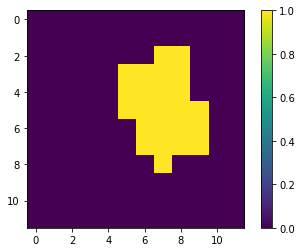

In [190]:

plt.imshow(labels_out[:,:,6])

plt.colorbar()

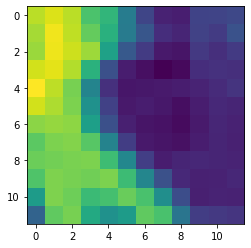

In [175]:
plt.imshow(box[:,:,6])


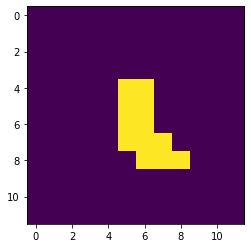

In [60]:
plt.imshow(mask_box[:,:,6])
